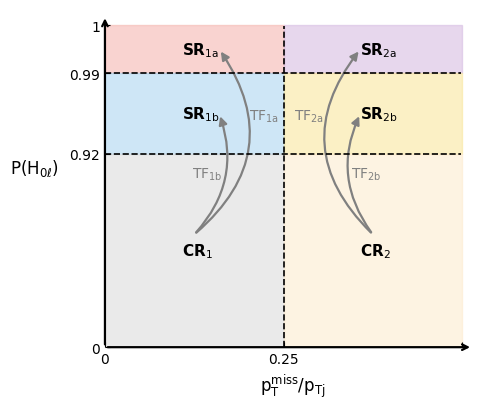

'./plots/signal_regions.pdf'

In [23]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrowPatch
import mplhep as hep

plt.rcParams['font.family'] = 'sans-serif'

def plot_mid_split(fname='signal_regions_mid.pdf', height=4.2):
    fig, ax = plt.subplots(figsize=(5, height))

    # hide outer frame
    for spine in ax.spines.values():
        spine.set_visible(False)

    # y positions
    y0, y1, y2, y3 = 0.0, 0.6, 0.85, 1.0
    x_split = 0.5  # move 0.25 tick to mid visually

    # dashed guides
    for y in (y1, y2):
        ax.axhline(y, xmin = 0, xmax =0.95, color='k', ls='--', lw=1.2)
    ax.axvline(x_split, ymin = 0, ymax = 0.95, color='k', ls='--', lw=1.2)

    # regions
    regions = [
        (0, y2, x_split, y3-y2, '#f5b7b1', r'SR$_{\mathrm{1a}}$', (0.215, (y2+y3)/2)),
        (0, y1, x_split, y2-y1, '#aed6f1', r'SR$_{\mathrm{1b}}$', (0.215, (y1+y2)/2)),
        (0, y0, x_split, y1-y0, '#dcdcdc', r'CR$_{\mathrm{1}}$', (0.215, (y0+y1)/2)),
        (x_split, y2, 1-x_split, y3-y2, '#d7bde2', r'SR$_{\mathrm{2a}}$', (0.715, (y2+y3)/2)),
        (x_split, y1, 1-x_split, y2-y1, '#f9e79f', r'SR$_{\mathrm{2b}}$', (0.715, (y1+y2)/2)),
        (x_split, y0, 1-x_split, y1-y0, '#fdebd0', r'CR$_{\mathrm{2}}$', (0.715, (y0+y1)/2)),
    ]
    for x,y,w,h,c,l,pos in regions:
        ax.add_patch(Rectangle((x,y), w, h, color=c, alpha=0.6))
        ax.text(*pos, l, fontsize=11, fontweight='bold', va='center')

    # curved arrow helper
    def curved_arrow(start, end, label, rad, txt_shift):
        arrow = FancyArrowPatch(start, end, arrowstyle='-|>', mutation_scale=12,
                                connectionstyle=f'arc3,rad={rad}', color='gray', lw=1.6)
        ax.add_patch(arrow)
        midx = (start[0]+end[0])/2 + txt_shift[0]
        midy = (start[1]+end[1])/2 + txt_shift[1]
        ax.text(midx, midy, label, fontsize=10, color='gray', ha='center', va='center')

    # new centers based on split
    cr1_center = (x_split/2, 0.35)
    curved_arrow(cr1_center, (0.32, (y2+y3)/2),
                 r'TF$_{\mathrm{1a}}$', rad=0.45, txt_shift=(0.16,0.08))
    curved_arrow(cr1_center, (0.32, (y1+y2)/2),
                 r'TF$_{\mathrm{1b}}$', rad=0.3, txt_shift=(0,0))

    cr2_center = (x_split + (1-x_split)/2, 0.35)
    curved_arrow(cr2_center, (0.715, (y2+y3)/2),
                 r'TF$_{\mathrm{2a}}$', rad=-0.45, txt_shift=(-0.16,0.08))
    curved_arrow(cr2_center, (0.715, (y1+y2)/2),
                 r'TF$_{\mathrm{2b}}$', rad=-0.3, txt_shift=(0,0))

    # axis labels and ticks
    ax.set_xlabel(r'$\mathrm{p}_\mathrm{T}^{\mathrm{miss}} / \mathrm{p}_{\mathrm{Tj}}$', fontsize=12)
    ax.set_ylabel(r'$\mathrm{P}(\mathrm{H}_{0\ell})$', fontsize=12, rotation=0, labelpad=25)

    ax.set_xticks([0, x_split, 1])
    ax.set_xticklabels([0, 0.25, ''])
    ax.set_yticks([y0, y1, y2, y3])
    ax.set_yticklabels([0, 0.92, 0.99, 1])

    ax.set_xlim(0,1.05)
    ax.set_ylim(0,1.05)
    ax.tick_params(direction='in')

    # axis arrowheads
    ax.annotate('', xy=(1.03, 0), xytext=(0,0),
                arrowprops=dict(arrowstyle='->', lw=1.6, color='k'))
    ax.annotate('', xy=(0, 1.03), xytext=(0,0),
                arrowprops=dict(arrowstyle='->', lw=1.6, color='k'))

    plt.tight_layout()
    plt.savefig(fname, bbox_inches='tight', pad_inches=0.05)
    plt.show()
    plt.close()
    return fname

pdf_path = plot_mid_split('./plots/signal_regions.pdf')
pdf_path
